In [2]:
from transpile_benchy.metrics.gate_counts import (
    DepthMetric,
    TotalMetric,
    TotalSwaps,
)
from qiskit.circuit.library import iSwapGate
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import Mirage, QiskitLevel3
from mirror_gates.utilities import SubsMetric
from mirror_gates.logging import transpile_benchy_logger

In [3]:
# N = 4
# coupling_map = CouplingMap.from_line(N)
coupling_map = CouplingMap.from_heavy_hex(5)
# coupling_map = CouplingMap.from_grid(6, 6)

In [4]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../../circuits/medium_circuits.txt")
# library = CircuitLibrary.from_txt("../../circuits/debug.txt")

In [5]:
# XXX set consolidate to False
# this is allowed only because my pass manager will preserve consolidation
# see post_stage, I call fastconsolidate manually

# NOTE: use TotalSwaps to verify baselines have > 0 swaps
# otherwise, there is no room for improvement.
# we can include these if we want to show our methods will still work
# but somewhat trivial since we just append VF2Layout
metrics = [
    DepthMetric(consolidate=False),
    TotalMetric(consolidate=False),
    TotalSwaps(consolidate=False),
    SubsMetric(),
]

transpilers = [
    # QiskitLevel3(coupling_map, cx_basis=True),
    # Mirage(coupling_map, cx_basis=True, parallel=0),
    QiskitLevel3(coupling_map),
    Mirage(coupling_map, logger=transpile_benchy_logger),
]

In [6]:
from transpile_benchy.benchmark import Benchmark

benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    logger=transpile_benchy_logger,
    num_runs=5,
)

benchmark.run()
# print(benchmark)

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


INFO:transpile_benchy:Running benchmarks for circuits...


Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | cx
  0.00% =    0/1    	 | 2.00	 | cx.cx
100.00% =    1/1    	 | 3.00	 | cx.cx.cx


Circuits from library:   0%|          | 0/15 [00:00<?, ?it/s]INFO:transpile_benchy:Running benchmark for circuit qec9xz_n17


Loading qec9xz_n17 from QASMBench


Circuits from library:   7%|▋         | 1/15 [01:30<21:13, 90.99s/it]INFO:transpile_benchy:Running benchmark for circuit seca_n11


Loading seca_n11 from QASMBench


Circuits from library:  13%|█▎        | 2/15 [03:14<21:20, 98.53s/it]INFO:transpile_benchy:Running benchmark for circuit qram_n20


Loading qram_n20 from QASMBench


Circuits from library:  20%|██        | 3/15 [05:34<23:30, 117.54s/it]INFO:transpile_benchy:Running benchmark for circuit knn_n25


Loading knn_n25 from QASMBench


Circuits from library:  27%|██▋       | 4/15 [07:48<22:43, 123.95s/it]INFO:transpile_benchy:Running benchmark for circuit swap_test_n25


Loading swap_test_n25 from QASMBench


Circuits from library:  33%|███▎      | 5/15 [10:17<22:10, 133.00s/it]INFO:transpile_benchy:Running benchmark for circuit bigadder_n18


Loading bigadder_n18 from QASMBench


Circuits from library:  40%|████      | 6/15 [13:03<21:37, 144.12s/it]INFO:transpile_benchy:Running benchmark for circuit multiplier_n15


Loading multiplier_n15 from QASMBench


Circuits from library:  47%|████▋     | 7/15 [17:11<23:43, 177.96s/it]INFO:transpile_benchy:Running benchmark for circuit qft_n18


Loading qft_n18 from QASMBench


Circuits from library:  53%|█████▎    | 8/15 [21:24<23:33, 201.94s/it]INFO:transpile_benchy:Running benchmark for circuit sat_n11


Loading sat_n11 from QASMBench


Circuits from library:  60%|██████    | 9/15 [25:36<21:45, 217.51s/it]

Loading portfolioqaoa_n16 from MQTBench


INFO:transpile_benchy:Running benchmark for circuit portfolioqaoa_n16


In [ ]:
print(benchmark)

NameError: name 'benchmark' is not defined

In [ ]:
benchmark.summary_statistics(transpilers[0], transpilers[1])

{'monodromy_depth': {'average_change': -3.8808498305139736,
  'aggregrate_change': -4.184801334611618,
  'best_circuit': 'bv_n30',
  'worst_circuit': 'wstate_n27'},
 'monodromy_total': {'average_change': 3.298939509763004,
  'aggregrate_change': 2.64380174629751,
  'best_circuit': 'wstate_n27',
  'worst_circuit': 'bv_n30'},
 'total_swaps': {'average_change': 6.568943509929307,
  'aggregrate_change': 13.137887019858614,
  'best_circuit': 'wstate_n27',
  'worst_circuit': 'bv_n30'},
 'accepted_subs': {'average_change': inf,
  'aggregrate_change': inf,
  'best_circuit': 'wstate_n27',
  'worst_circuit': 'bv_n30'},
 'total_runtime': {'average_change': 6263.082430370761,
  'aggregrate_change': 2388.953573785447,
  'best_circuit': 'wstate_n27',
  'worst_circuit': 'bv_n30'}}

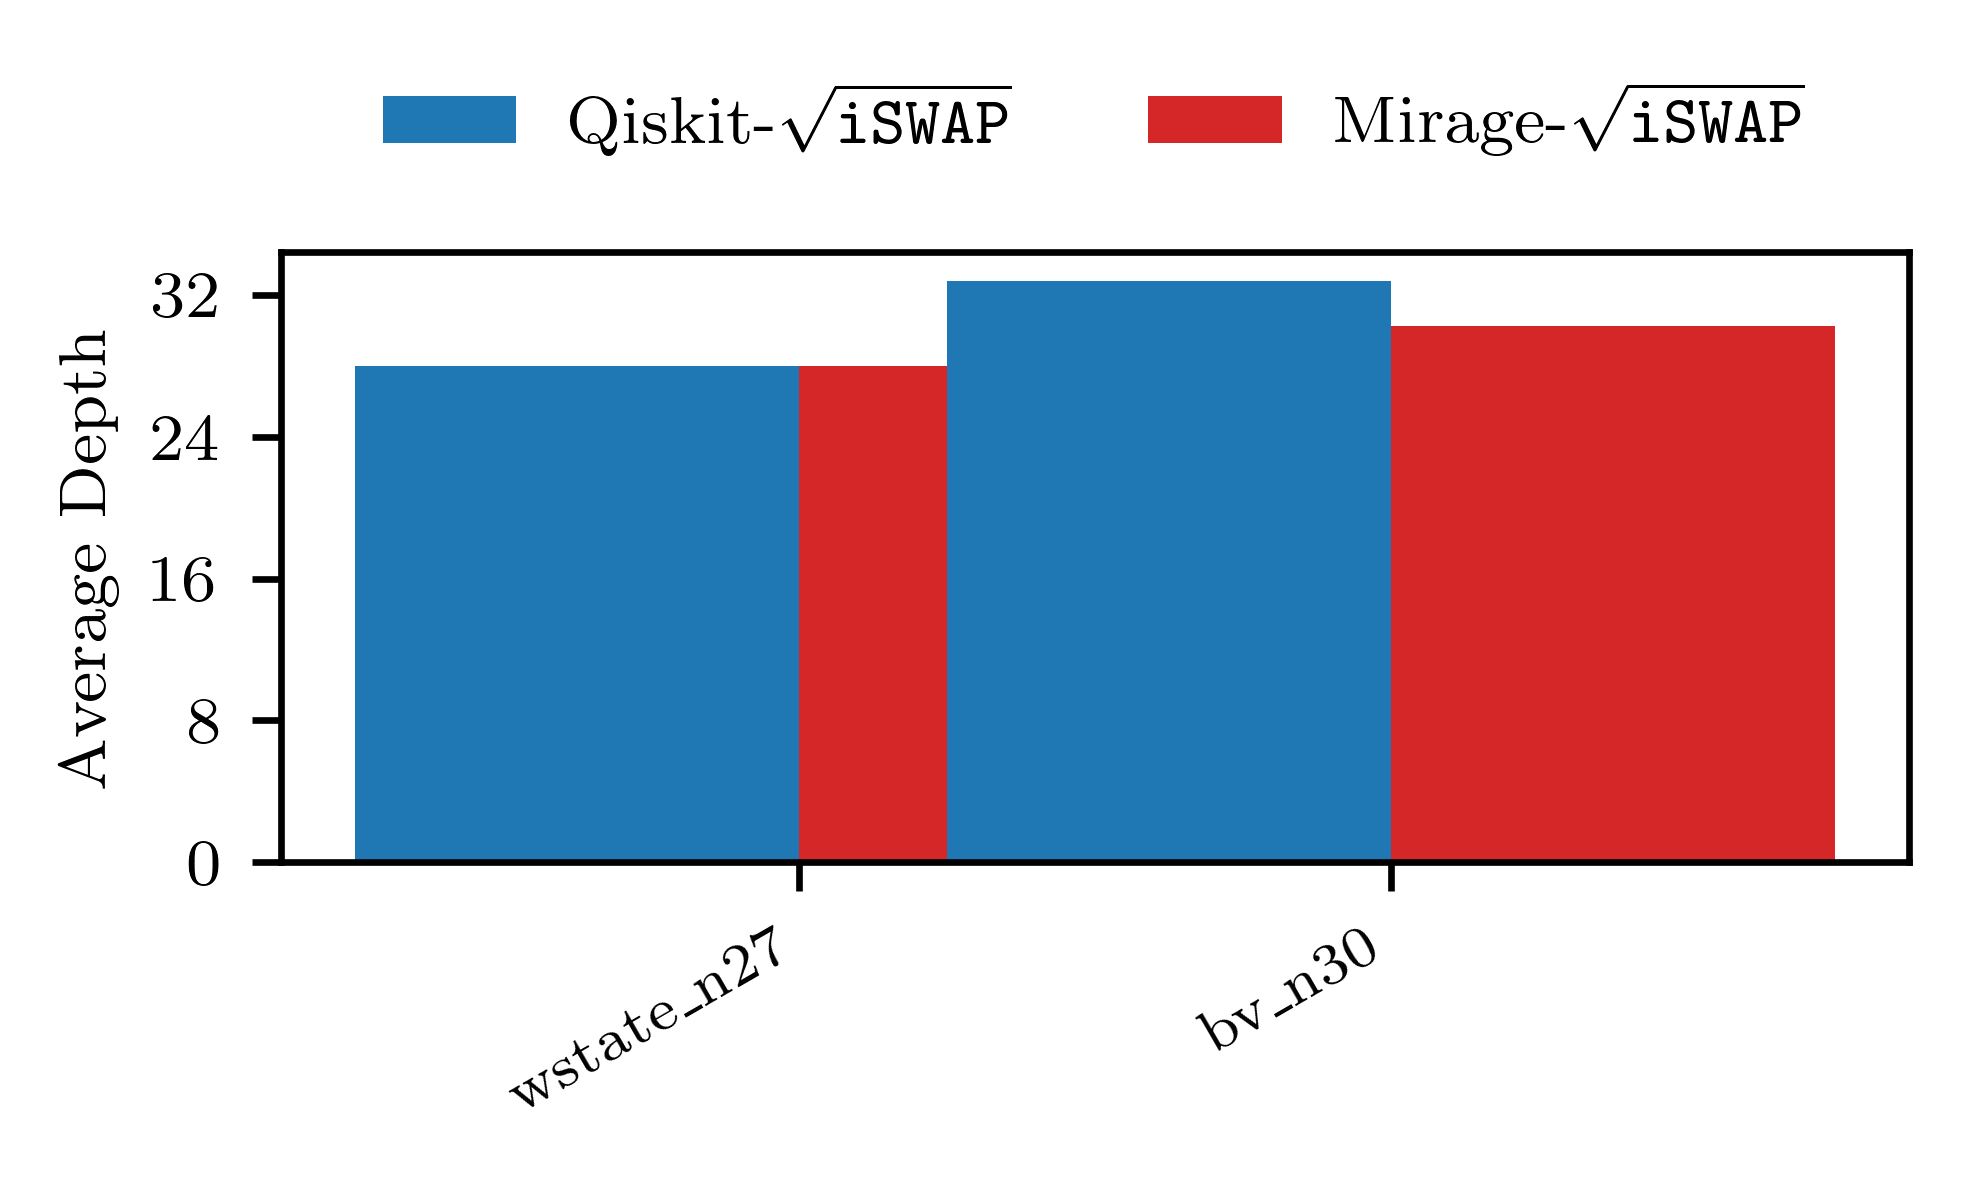

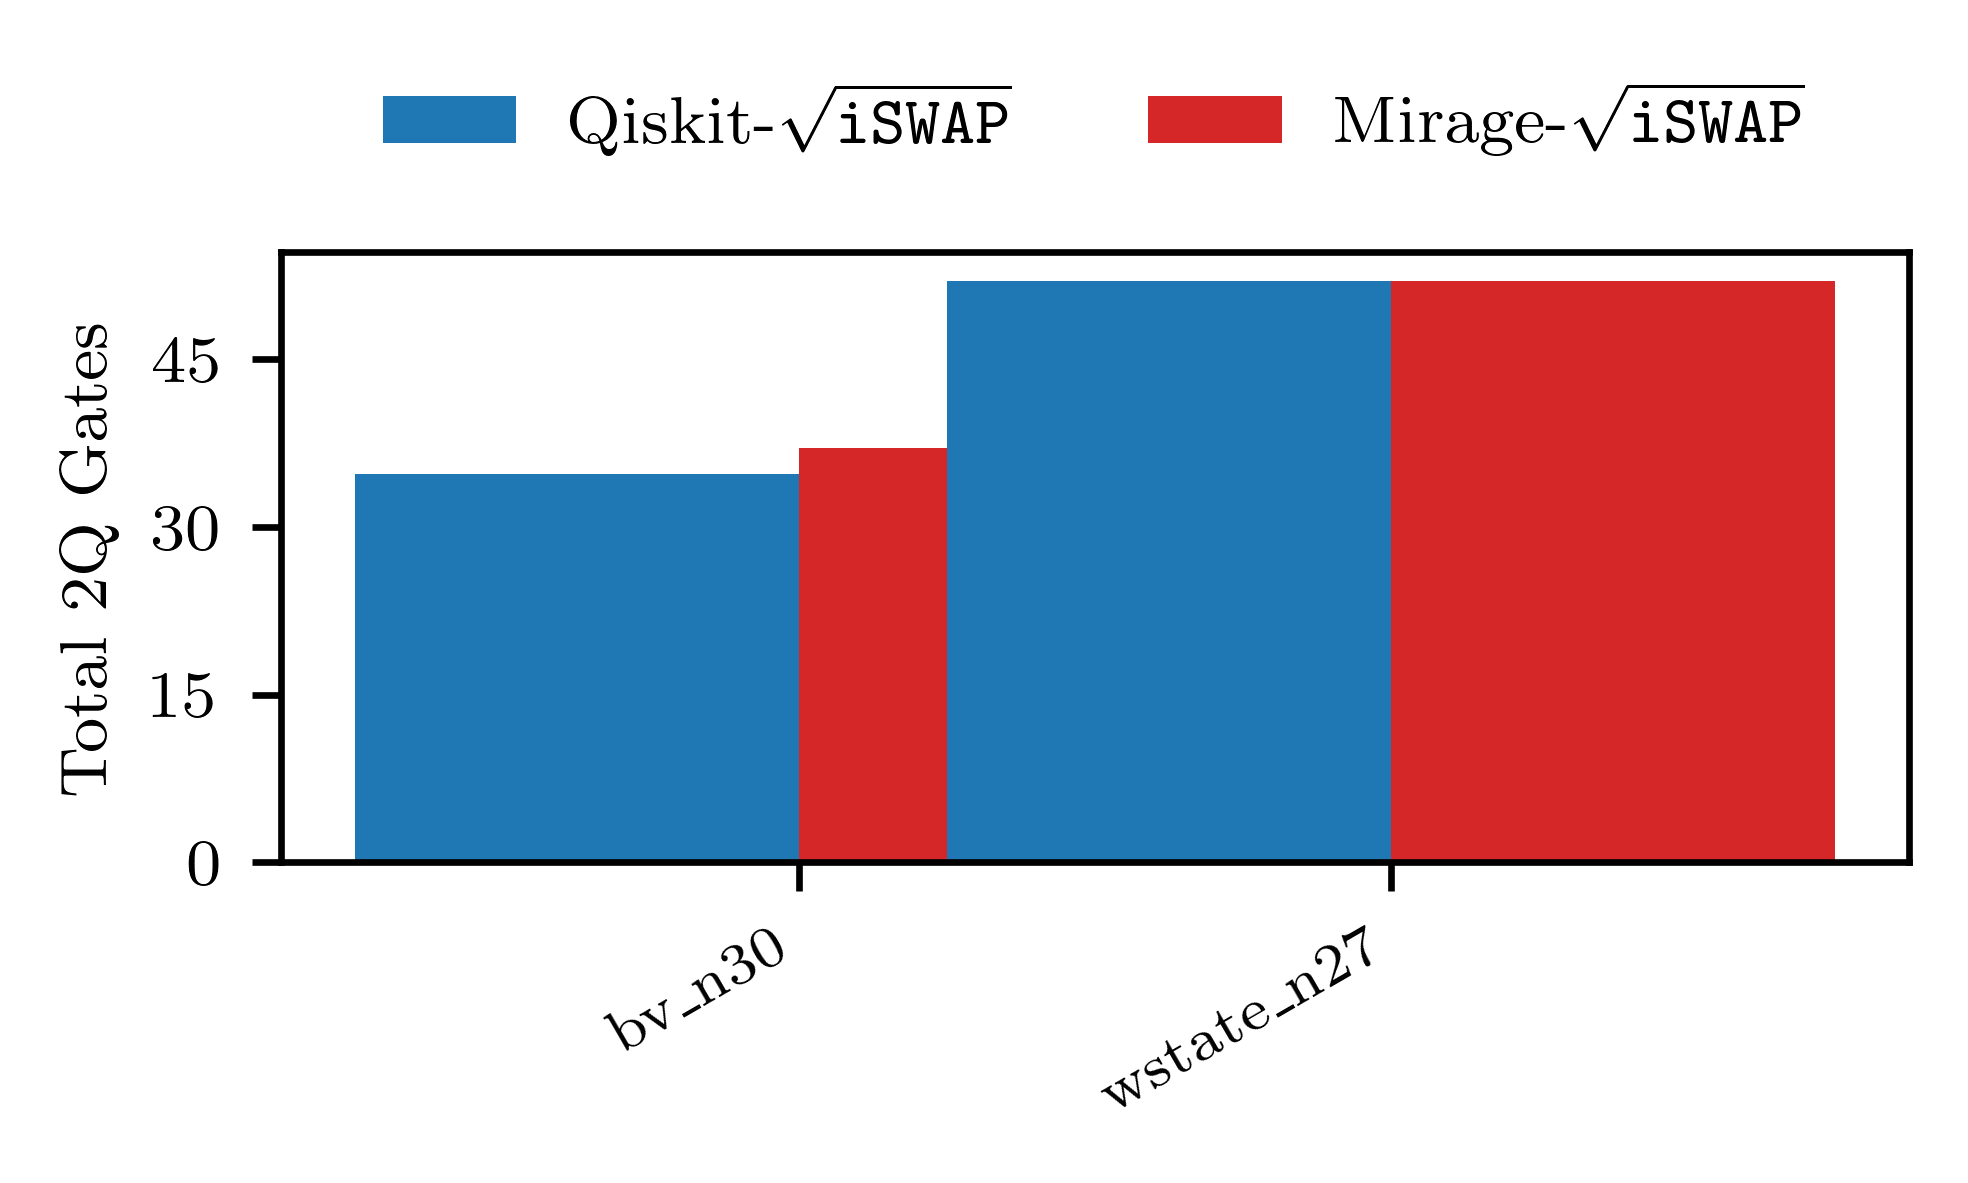

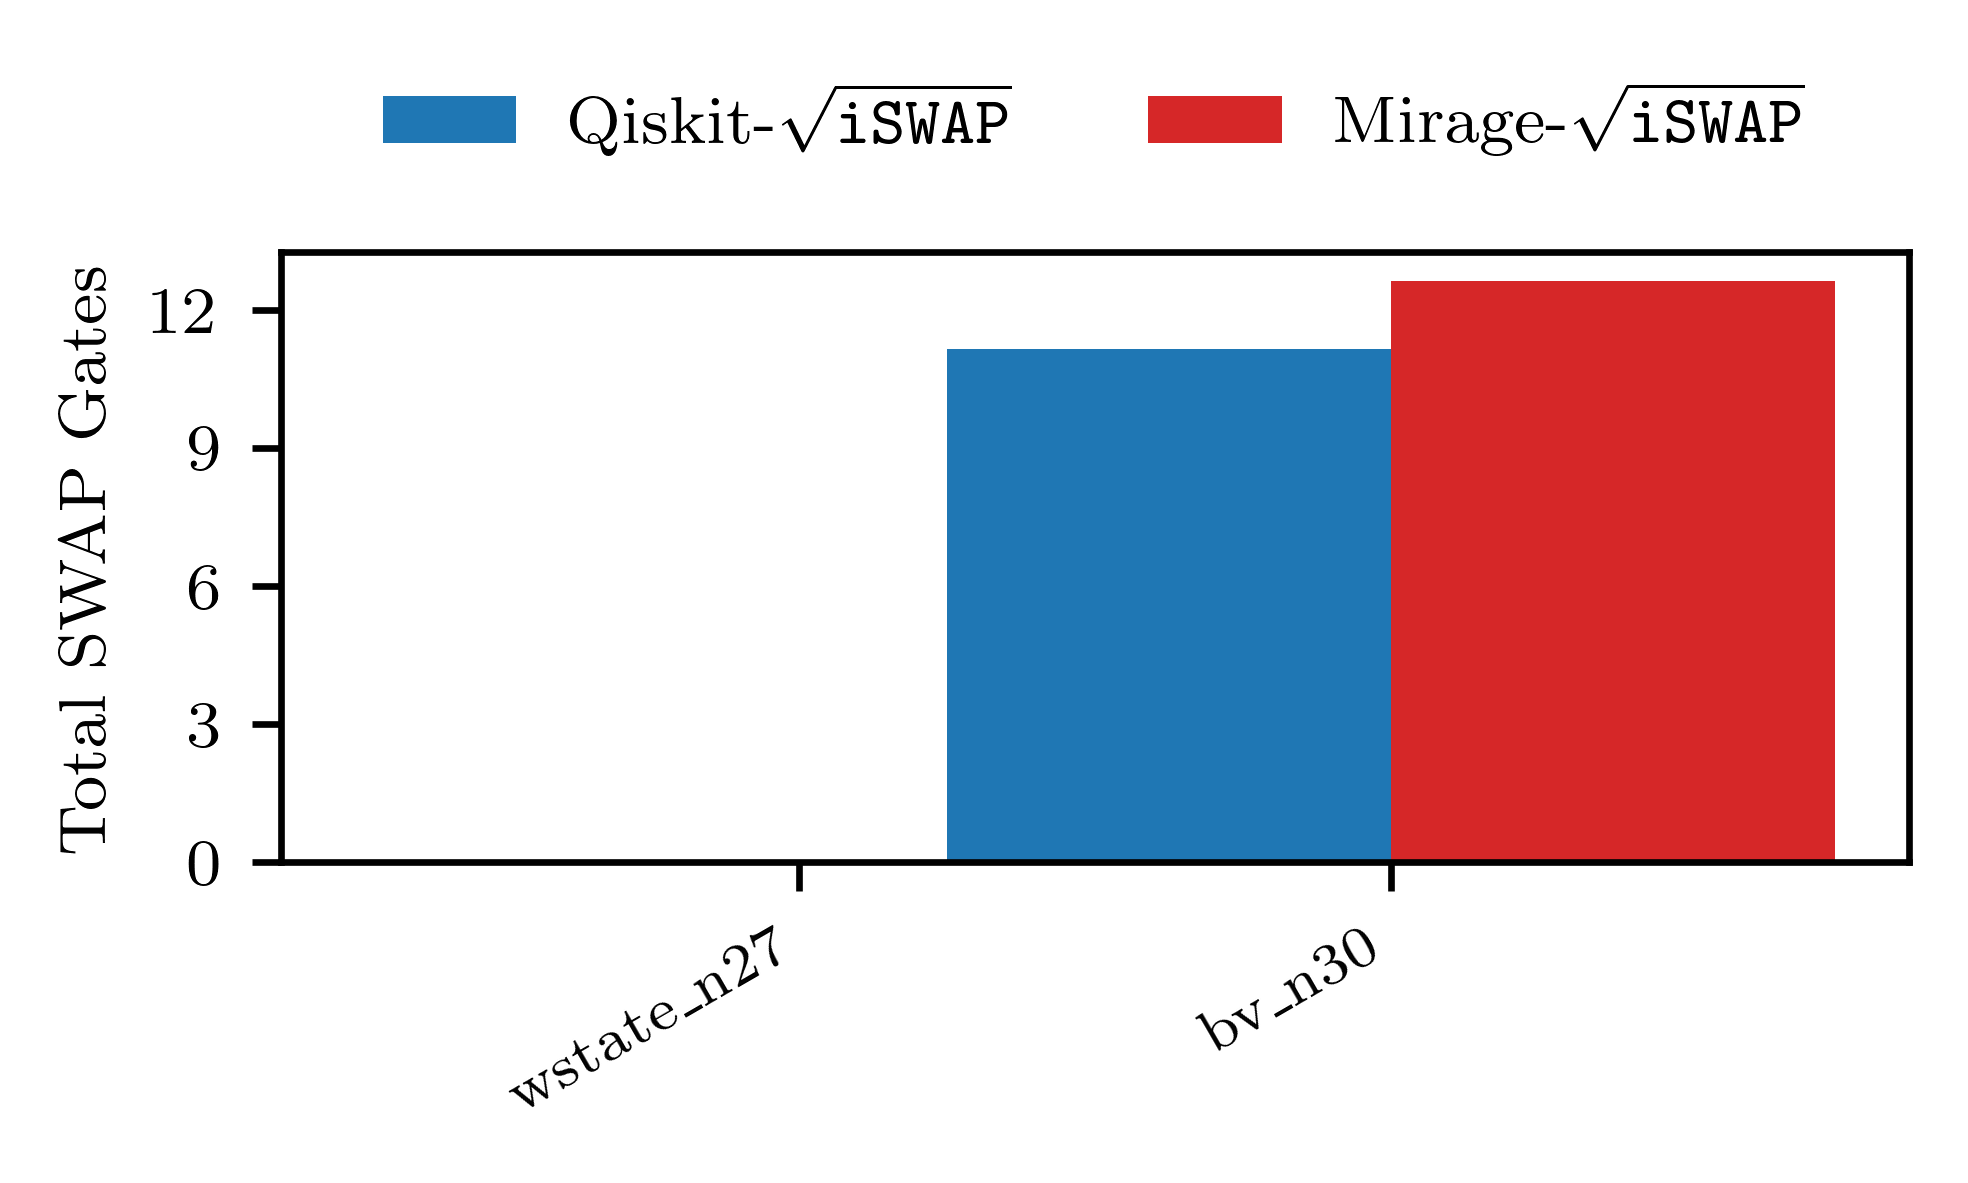

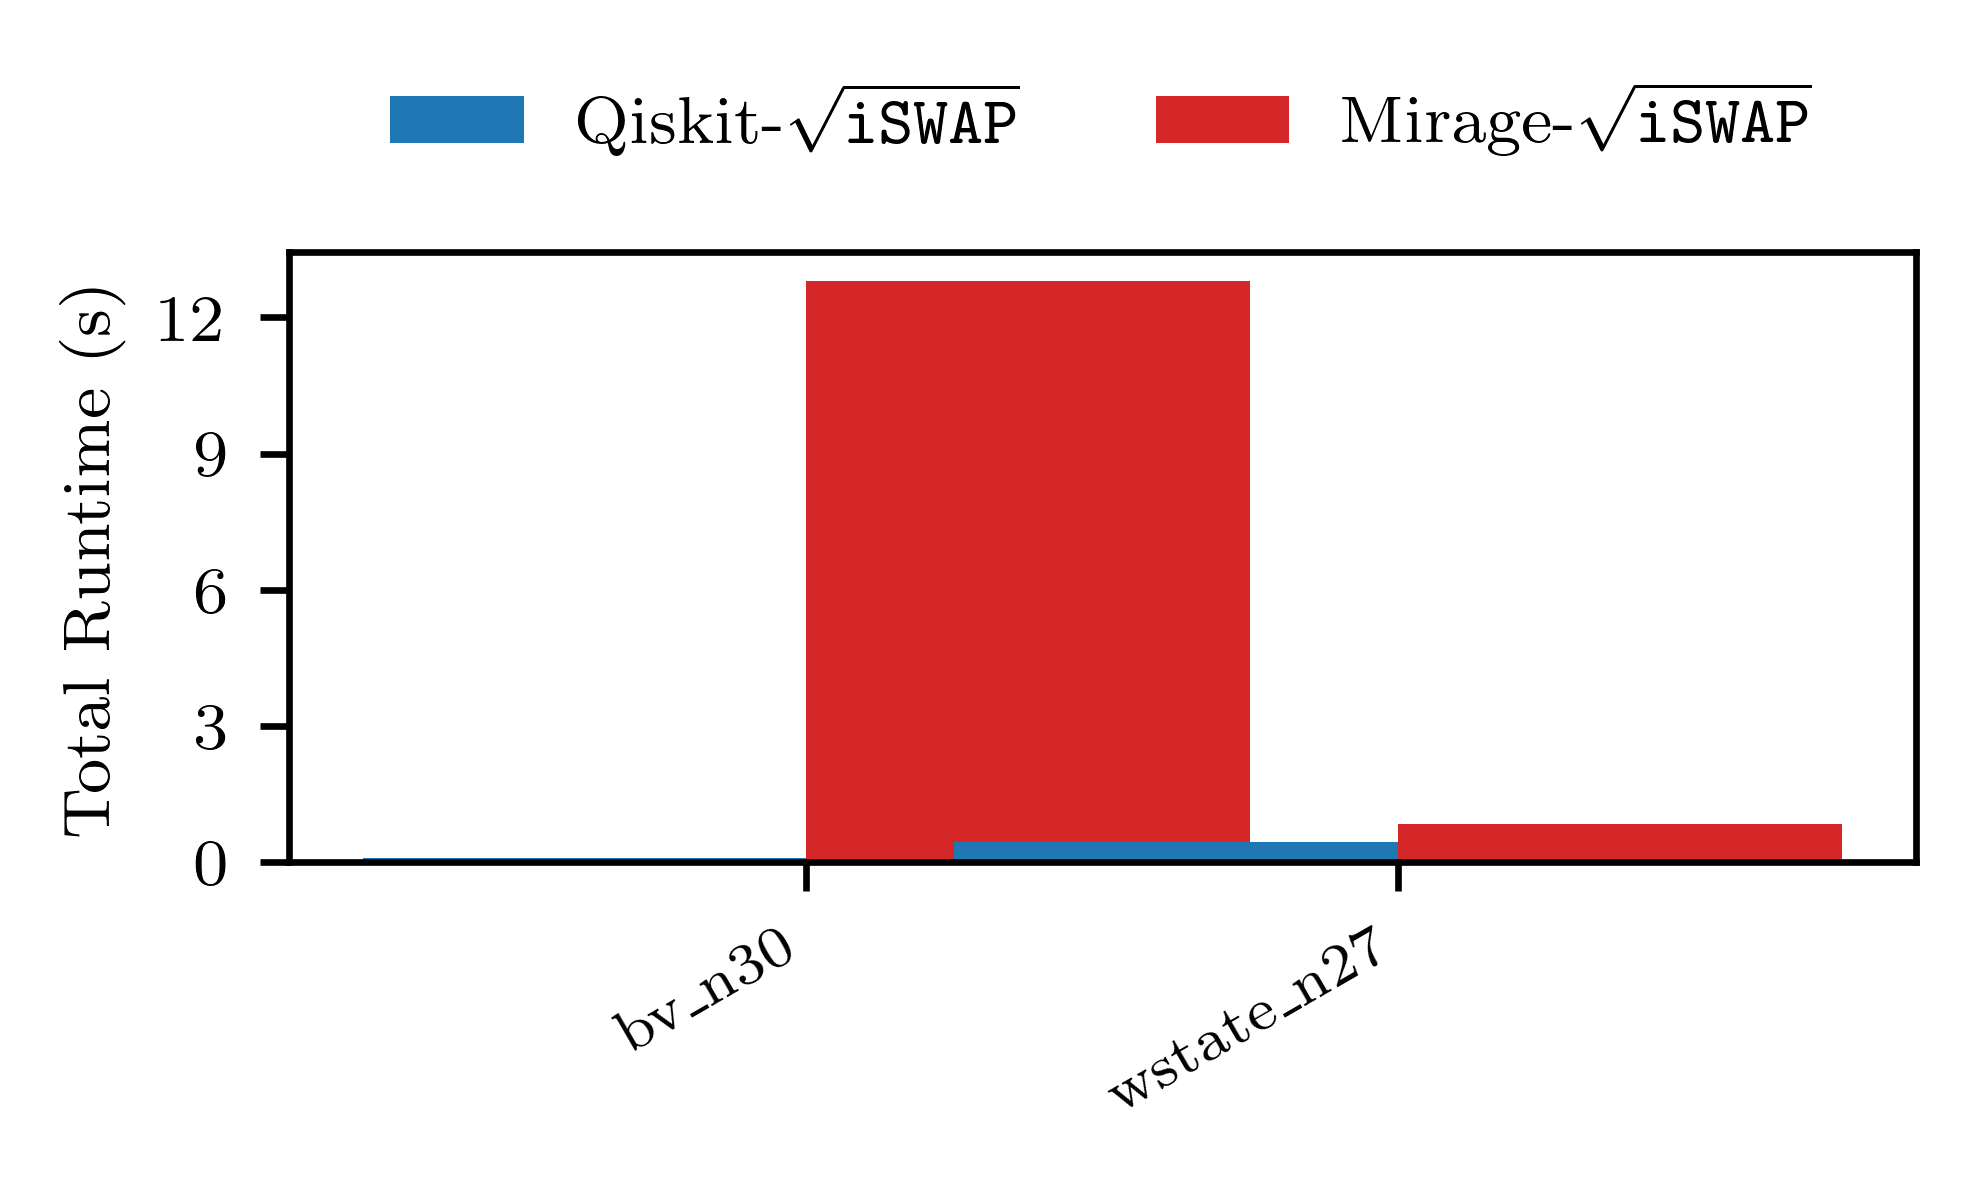

In [ ]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=1, legend_show=1, filename="hex", color_override=[0, 3])